# Simple example

In [1]:
# import libraries and modules
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.special import rel_entr

In [2]:
# fix random seed
np.random.seed(42)

In [3]:
# define probability distributions
p = np.array([0.1, 0.4, 0.5])
q = np.array([0.8, 0.15, 0.05])
r = np.array([0.85, 0.1, 0.05])

In [4]:
def kld(y_true, y_pred):
    """Computes Kullback-Leibler divergence between `y_true` and `y_pred`.
      `loss = y_true * log(y_true / y_pred)`
    """
    return np.sum(y_true * np.log(y_true / y_pred))

In [5]:
# calculate KL Divergence between p and q
kld(p, q)

1.3356800935337299

In [6]:
# verify with scipy's rel_entr function
np.sum(rel_entr(p, q))

1.3356800935337299

In [7]:
# calculate KL Divergence between q and r
kld(q, r)

0.012320068763076841

In [8]:
# calculate KL Divergence between p and p
kld(p, p)

0.0

# Data compression example

In [9]:
# set number of data points
N = 1000

In [10]:
# create original data (distribution A)
A = np.concatenate((np.random.normal(3, 0.5, int(0.3 * N)),
                    np.random.normal(5, 0.5, int(0.7 * N))))

In [11]:
# create data compressed by conventional algorithm (distribution B)
B = np.random.normal(4, 1, N)

In [12]:
# create data compressed by deep learning algorithm (distribution C)
C = np.concatenate((np.random.normal(3, 0.5, int(0.4 * N)),
                    np.random.normal(5, 0.5, int(0.6 * N))))

In [13]:
# create bins to visualize data
bins = np.linspace(1, 7, 20)
bin_centers = 0.5*(bins[1:] + bins[:-1])

In [14]:
bins

array([1.        , 1.31578947, 1.63157895, 1.94736842, 2.26315789,
       2.57894737, 2.89473684, 3.21052632, 3.52631579, 3.84210526,
       4.15789474, 4.47368421, 4.78947368, 5.10526316, 5.42105263,
       5.73684211, 6.05263158, 6.36842105, 6.68421053, 7.        ])

In [15]:
# get probability density for distribution A
A_prob, _ = np.histogram(A, bins=bins, density=True)
A_prob

array([0.        , 0.00316667, 0.00316667, 0.0475    , 0.133     ,
       0.2185    , 0.24383333, 0.18683333, 0.0855    , 0.09816667,
       0.21216667, 0.47183333, 0.53833333, 0.494     , 0.247     ,
       0.14566667, 0.03483333, 0.00316667, 0.        ])

In [16]:
# get probability density for distribution B
B_prob, _ = np.histogram(B, bins=bins, density=True)
B_prob

array([0.01903808, 0.01586506, 0.02221109, 0.06028724, 0.09836339,
       0.14278557, 0.23480294, 0.31730127, 0.38076152, 0.41249165,
       0.38710755, 0.33951236, 0.26018704, 0.21259185, 0.13326653,
       0.04759519, 0.05711423, 0.0253841 , 0.        ])

In [17]:
# get probability density for distribution C
C_prob, _ = np.histogram(C,bins=bins, density=True)
C_prob

array([0.        , 0.00316667, 0.019     , 0.0665    , 0.17416667,
       0.2755    , 0.30083333, 0.26916667, 0.12983333, 0.09183333,
       0.18683333, 0.38      , 0.4275    , 0.456     , 0.2375    ,
       0.12033333, 0.019     , 0.00633333, 0.00316667])

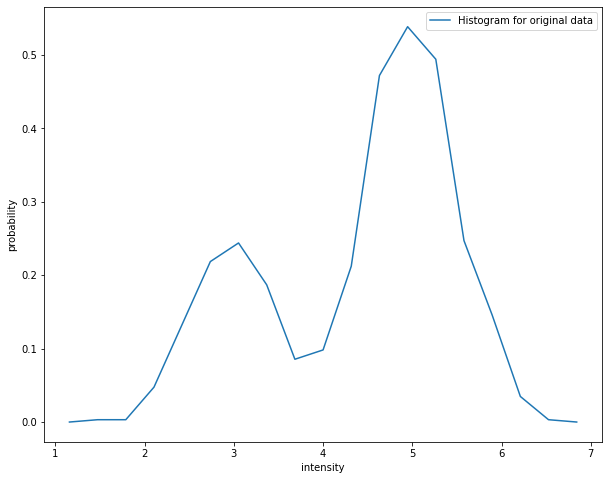

In [18]:
# plot probability distribution of original data
plt.figure(figsize=(10, 8))

plt.plot(bin_centers, A_prob, label="Histogram for original data")
plt.xlabel('intensity')
plt.ylabel('probability')

plt.legend()
plt.show()

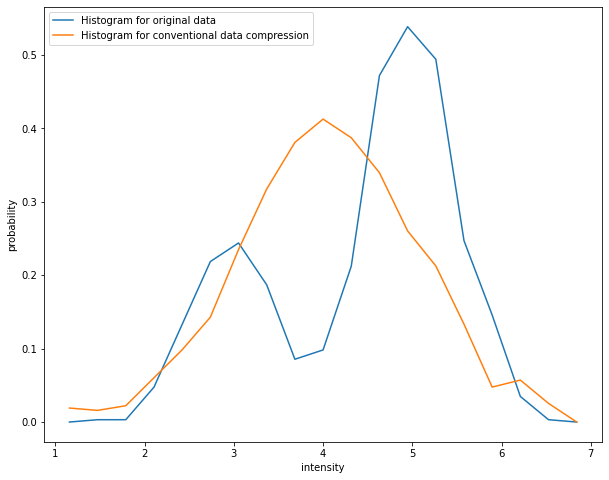

In [19]:
# plot probability distribution of original data alongside comventional data compression
plt.figure(figsize=(10, 8))

plt.plot(bin_centers, A_prob, label="Histogram for original data")
plt.plot(bin_centers, B_prob, label="Histogram for conventional data compression")
plt.xlabel('intensity')
plt.ylabel('probability')

plt.legend()
plt.show()

In [20]:
# calculate KL Divergence between distribution A and B
np.sum(rel_entr(A_prob, B_prob))

0.8792761831909446

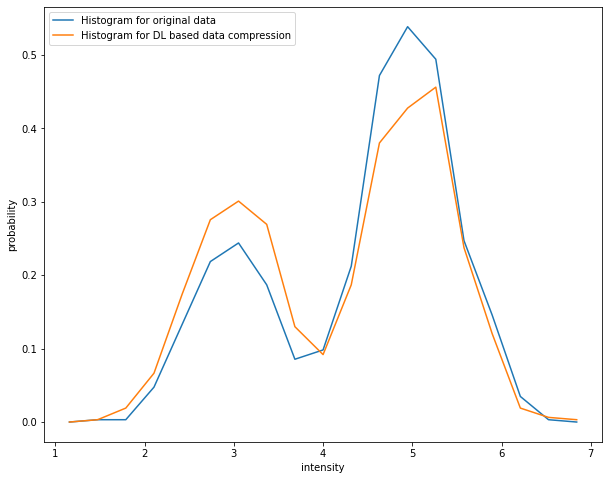

In [21]:
# plot probability distribution of original data alongside DL based data compression
plt.figure(figsize=(10, 8))

plt.plot(bin_centers, A_prob, label="Histogram for original data")
plt.plot(bin_centers, C_prob, label="Histogram for DL based data compression")
plt.xlabel('intensity')
plt.ylabel('probability')

plt.legend()
plt.show()

In [22]:
# calculate KL Divergence between distribution A and C
np.sum(rel_entr(A_prob, C_prob))

0.09240730459582974